In [ ]:
"""
to do list

- get confidence level per pic
- add more data (but that's always thing)

"""

"\nto do list\n\n- add call back stop rule\n- add more data (but that's always)\n- get the pretrained base connected\n- add categories properly \n- \n\n"

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-ca2d2fe1-bf10-12b2-4b7f-e73f6789c643)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data = '/content/drive/MyDrive/Colab-Notebooks/Mail-Truck-Project/data'

categories = ['train', 'validation']

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

data_dir = data
batch_size = 1000000
img_height = 224
img_width = 224

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels = 'inferred',
  label_mode = 'binary',
  class_names = categories)

ds_valid = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels = 'inferred',
  label_mode = 'binary',
  class_names = categories)

Found 159 files belonging to 2 classes.
Using 128 files for training.
Found 159 files belonging to 2 classes.
Using 31 files for validation.


[link to code in next cell](https://github.com/demolakstate/anomaly_detection_sport_video/blob/main/Convolutional_autoencoder_3.ipynb)

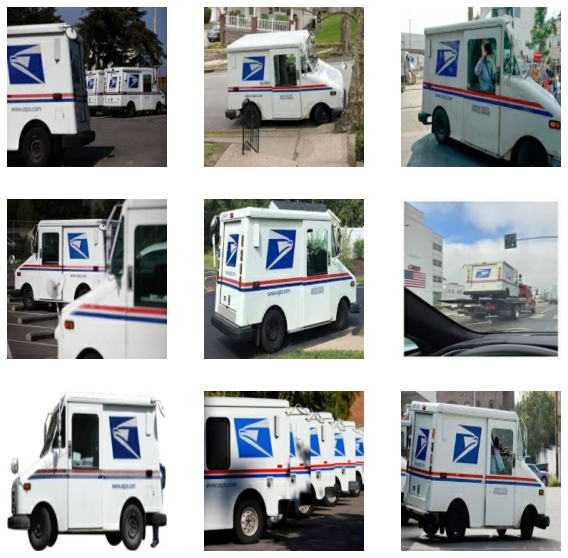

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

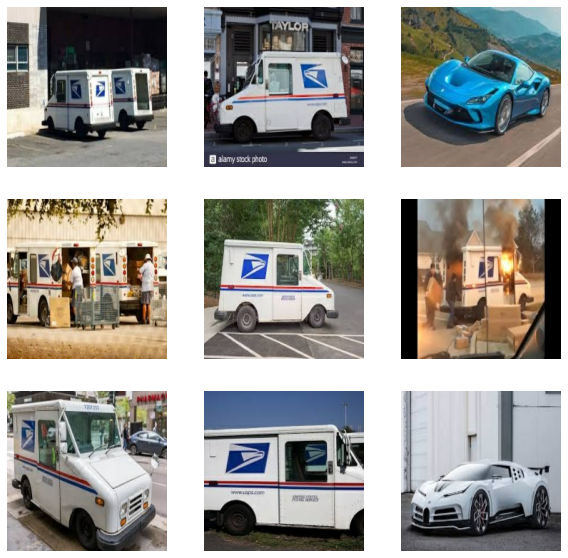

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_valid.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
import tensorflow_datasets as tfds

x_train = None
vavalidation_data=3
for image, label in tfds.as_numpy(ds_train):
  print(type(image), type(label), label, len(label))
  x_train = image
  print('------')

  x_test = None

for image, label in tfds.as_numpy(ds_valid):
  print(type(image), type(label), label, len(label))
  x_test = image
  print('------')

<class 'numpy.ndarray'> <class 'numpy.ndarray'> [[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]] 128
------
<class 'numpy.ndarray'> <class 'numpy.ndarray'> [[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

In [74]:
# The goal of this net is to recognize mailtrucks lol 
from keras.applications.vgg16 import VGG16

pretrained_base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

pretrained_base.trainable = False

model = keras.Sequential([
    
    preprocessing.Resizing(224, 224, interpolation="bilinear", name=data),

    # input layers takes shape of data for this models use case
    layers.InputLayer(input_shape=[224, 224]),

    # preprocessing for data augmentation to make more use out of our data, mailtucks
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),

    #pretrained base
    pretrained_base,
    
    # block 1, the start of the convulution blocks
    layers.BatchNormalization(renorm=True),
    layers.Convolution2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D((2,2), padding='same'),
    
    # block 2
    layers.BatchNormalization(renorm=True),
    layers.Convolution2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D((2,2), padding='same'),
    
    # block 3
    layers.BatchNormalization(renorm=True),
    layers.Convolution2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Convolution2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D((2,2), padding='same'),
    
    # then the head of the vision net
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [75]:
model.compile(
             optimizer='adam',
             loss='binary_crossentropy',
             metrics=['binary_accuracy'],
             )

Epoch 1/80
1/1 [==============================] - 2s 2s/step - loss: 0.2097 - binary_accuracy: 0.9375 - val_loss: 0.4987 - val_binary_accuracy: 0.9032
Epoch 2/80
1/1 [==============================] - 2s 2s/step - loss: 0.2058 - binary_accuracy: 0.9219 - val_loss: 0.4830 - val_binary_accuracy: 0.9032
Epoch 3/80
1/1 [==============================] - 2s 2s/step - loss: 0.2232 - binary_accuracy: 0.9141 - val_loss: 0.4556 - val_binary_accuracy: 0.9032
Epoch 4/80
1/1 [==============================] - 2s 2s/step - loss: 0.2221 - binary_accuracy: 0.9297 - val_loss: 0.4250 - val_binary_accuracy: 0.9032
Epoch 5/80
1/1 [==============================] - 2s 2s/step - loss: 0.2522 - binary_accuracy: 0.9219 - val_loss: 0.4014 - val_binary_accuracy: 0.9032
<BatchDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.float32, tf.float32)> <BatchDataset shapes: ((None, 224, 224, 3), (None, 1)), types: (tf.float32, tf.float32)>


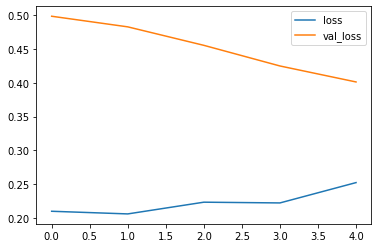

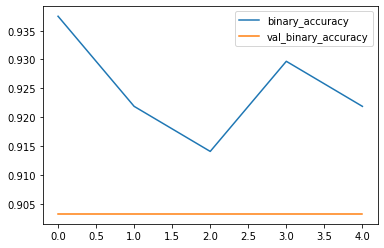

In [78]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=80,
    callbacks = [callback],
)

print(ds_train, ds_valid)


#plot the fit
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [79]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
/content/drive/MyDrive/Colab multiple                  0         
_________________________________________________________________
input_40 (InputLayer)        [(None, 224, 224)]        0         
_________________________________________________________________
random_contrast_19 (RandomCo multiple                  0         
_________________________________________________________________
random_flip_19 (RandomFlip)  multiple                  0         
_________________________________________________________________
random_rotation_19 (RandomRo multiple                  0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
batch_normalization_73 (Batc multiple                